In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from aptos.data_loader import SamplerFactory

In [73]:
df = pd.read_csv('../data/preprocessed/train.csv')
df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [65]:
candidate_idx = df.index.values
batch_size = 32
n_batches = 5
alpha = 0.5
sampler = SamplerFactory().get(df, candidate_idx, batch_size, n_batches, alpha)

In [74]:
def class_of_idx(idx):
    return df['diagnosis'][idx]

def class_of_idxs(idxs):
    return [class_of_idx(idx) for idx in idxs]

def class_counts(classes):
    return {c: classes.count(c) for c in range(5)}

In [75]:
for bidx, batch in enumerate(sampler):
    classes = class_of_idxs(batch)
    counts  = class_counts(classes)
    print(f'Batch: {bidx}')
    print(f'Classes: {classes}')
    print(f'Counts: {counts}\n')

KeyError: 12243

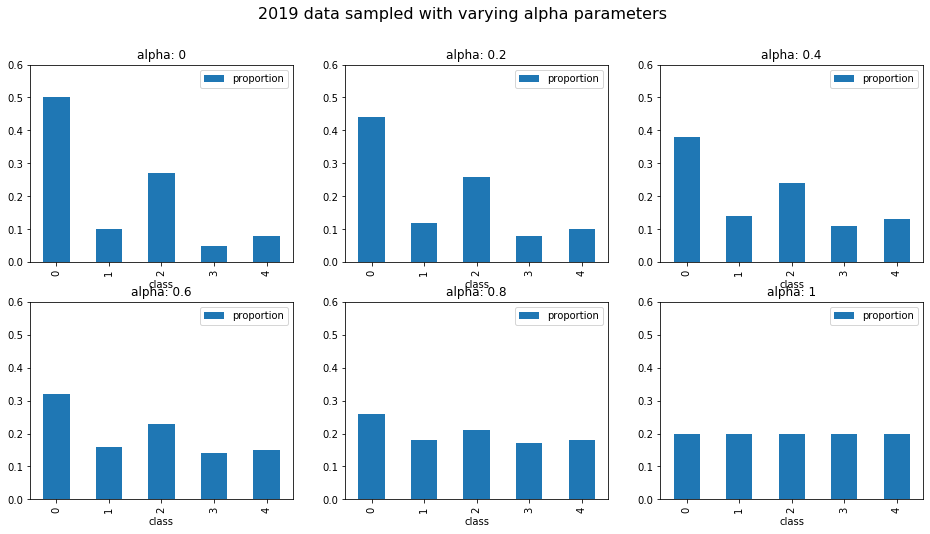

In [91]:
df = pd.read_csv('../data/preprocessed/train.csv')
candidate_idx = df.index.values
batch_size = 100
n_batches = 5
alphas = [0, 0.2, 0.4, 0.6, 0.8, 1]

nrow = 2
ncol = len(alphas) // nrow
fig, axs = plt.subplots(nrow, ncol, figsize=(16, 8))

for i, alpha in enumerate(alphas):
    sampler = SamplerFactory().get(df, candidate_idx, batch_size, n_batches, alpha)

    for idxs in sampler:
        classes = class_of_idxs(idxs)
        counts = class_counts(classes)
        break

    df_dist = pd.DataFrame({
        'class': list(range(5)), 
        'proportion': [counts[c] / batch_size for c in range(5)]
    }).set_index('class')
    
    row = i // ncol
    col = i % ncol
          
    df_dist.plot(kind='bar', ax=axs[row, col])
    axs[row, col].set_title(f'alpha: {alpha}')
    axs[row, col].set_ylim(0, 0.6)

fig.suptitle('2019 data sampled with varying alpha parameters', fontsize=16)
plt.savefig('../resources/sample-distributions-2019-data.png', bbox_inches='tight')
plt.show()

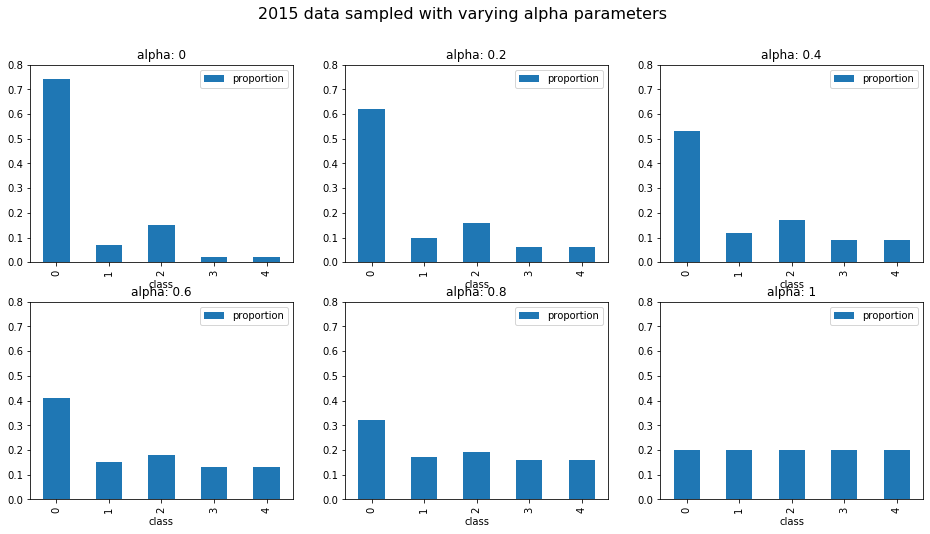

In [92]:
df = pd.read_csv('../data/preprocessed/diabetic-retinopathy-detection/train.csv')
candidate_idx = df.index.values
batch_size = 100
n_batches = 5
alphas = [0, 0.2, 0.4, 0.6, 0.8, 1]

nrow = 2
ncol = len(alphas) // nrow
fig, axs = plt.subplots(nrow, ncol, figsize=(16, 8))

for i, alpha in enumerate(alphas):
    sampler = SamplerFactory().get(df, candidate_idx, batch_size, n_batches, alpha)

    for idxs in sampler:
        classes = class_of_idxs(idxs)
        counts = class_counts(classes)
        break

    df_dist = pd.DataFrame({
        'class': list(range(5)), 
        'proportion': [counts[c] / batch_size for c in range(5)]
    }).set_index('class')
    
    row = i // ncol
    col = i % ncol
          
    df_dist.plot(kind='bar', ax=axs[row, col])
    axs[row, col].set_title(f'alpha: {alpha}')
    axs[row, col].set_ylim(0, 0.8)

fig.suptitle('2015 data sampled with varying alpha parameters', fontsize=16)
plt.savefig('../resources/sample-distributions-2015-data.png', bbox_inches='tight')
plt.show()